Training a game-playing AI that gets points for making moves that lead to winning the game

In [64]:
import numpy as np 
from sklearn.linear_model import LinearRegression
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([4,8,12,16,20])

model = LinearRegression()
model.fit(X, y)

X_test = np.array([[6]])
y_pred = model.predict(X_test)
print(f'predicted score for studying 6 hours :{y_pred[0]}')


predicted score for studying 6 hours :24.000000000000004


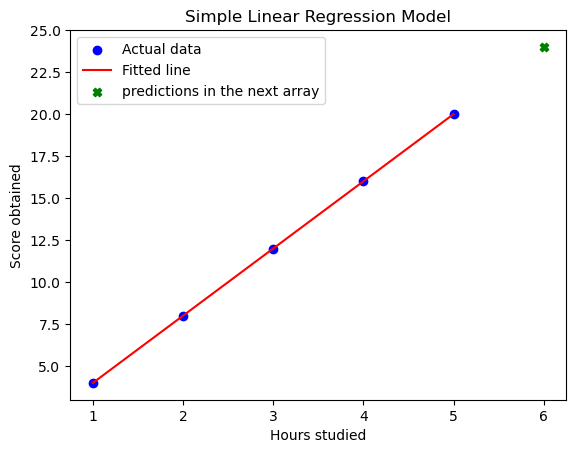

In [65]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color='blue', label = 'Actual data')
plt.plot(X,model.predict(X),color='red', label = 'Fitted line')
plt.scatter(X_test,y_pred,color='green',marker ='X',label = 'predictions in the next array')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()

In [66]:
import pandas as pd 
data = pd.read_csv('auto-mpg.csv') 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [67]:
from sklearn.model_selection import train_test_split 
train , test = train_test_split(data)


In [68]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
377,38.0,4,91.0,67,1965,15.0,82,3,honda civic
368,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
184,27.0,4,101.0,83,2202,15.3,76,2,renault 12tl
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510
303,28.4,4,151.0,90,2670,16.0,79,1,buick skylark limited


In [69]:
test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
99,18.0,6,250.0,88,3021,16.5,73,1,ford maverick
238,30.5,4,97.0,78,2190,14.1,77,2,volkswagen dasher
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10
223,17.5,6,250.0,110,3520,16.4,77,1,chevrolet concours
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 377 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           294 non-null    float64
 1   cylinders     294 non-null    int64  
 2   displacement  294 non-null    float64
 3   horsepower    294 non-null    int64  
 4   weight        294 non-null    int64  
 5   acceleration  294 non-null    float64
 6   model year    294 non-null    int64  
 7   origin        294 non-null    int64  
 8   car name      294 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 23.0+ KB


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 99 to 63
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     float64
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  98 non-null     float64
 6   model year    98 non-null     int64  
 7   origin        98 non-null     int64  
 8   car name      98 non-null     object 
dtypes: float64(3), int64(5), object(1)
memory usage: 7.7+ KB


train has 294 values and test has 98 values

In [72]:
y = data[['mpg']] 
X = data.drop(['mpg','car name'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y) 


In [73]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
168,4,140.0,78,2592,18.5,75,1
303,4,151.0,90,2670,16.0,79,1
375,4,107.0,75,2205,14.5,82,3
55,4,91.0,70,1955,20.5,71,1
52,4,71.0,65,1773,19.0,71,3


In [74]:
y_train.head()

,mpg
168,23.0
303,28.4
375,36.0
55,26.0
52,31.0


In [75]:
print(len(X_train), len(X_test),len(y_train),len(y_test))

294 98 294 98


In [76]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42)

In [77]:
print(len(X_train), len(X_test),len(y_train),len(y_test))

294 98 294 98


In [78]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

log transformations

In [79]:
from sklearn.preprocessing import FunctionTransformer 
import numpy as np 

log_transformer = FunctionTransformer(np.log, validate = True)
log_columns = ['displacement','horsepower','weight']
new_log_columns = ['log_disp','log_hp','log_wt'] 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]),columns = new_log_columns, index = X_train.index) 
X_train_log.head()

,log_disp,log_hp,log_wt
265,4.897840,4.553877,7.847763
16,5.293305,4.574711,7.928046
66,6.061457,5.337538,8.440960
158,5.442418,4.700480,8.270525
7,6.086775,5.370638,8.369157


In [80]:
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]),columns = new_log_columns , index = X_test.index) 
X_test_log.head()

,log_disp,log_hp,log_wt
78,4.564348,4.234107,7.691200
274,4.795791,4.744932,7.935587
246,4.510860,4.094345,7.495542
55,4.510860,4.248495,7.578145
387,4.941642,4.454347,7.933797


one-hot encoding

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
ohe = OneHotEncoder(drop ='first',sparse = False) 
cat_columns = ['origin'] 
X_train_cat = X_train.loc[:,cat_columns]  
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat),index = X_train.index)
X_train_ohe.head()


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1
265,0.0,1.0
16,0.0,0.0
66,0.0,0.0
158,0.0,0.0
7,0.0,0.0


In [83]:
cols_to_drop = log_columns + cat_columns 
X_train = X_train.drop(columns = cols_to_drop) 
X_train_tr = pd.concat([X_train,X_train_log, X_train_ohe],axis=1)
X_train_tr.head()

,cylinders,acceleration,model year,log_disp,log_hp,log_wt,0,1
265,4,14.2,78,4.897840,4.553877,7.847763,0.0,1.0
16,6,15.5,70,5.293305,4.574711,7.928046,0.0,0.0
66,8,11.0,72,6.061457,5.337538,8.440960,0.0,0.0
158,6,21.0,75,5.442418,4.700480,8.270525,0.0,0.0
7,8,8.5,70,6.086775,5.370638,8.369157,0.0,0.0


transforming testing set

In [84]:
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),index = X_test.index) 
X_test_ohe.head()

,0,1
78,1.0,0.0
274,1.0,0.0
246,0.0,1.0
55,0.0,0.0
387,0.0,0.0
